# Исследование надежности заемщиков


**Цель исследования** - ответить на следующие вопросы заказчика (кредитный отдел банка):

- Есть ли зависимость между количеством детей у клиента и возвратом кредита в срок?
- Есть ли зависимость между семейным положением клиентом и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода клиента и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

**Ход исследования:**

Данные о клиентах необходимо получить из файла /datasets/data.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Необходимо проверить данные на ошибки и оцените их влияние на исследование. Затем, на этапе предобработки выполняется исправление самых критичных ошибок в данных, которые могут влиять на результат исследования.

Таким образом, исследование пройдёт в три этапа:

Обзор данных.
Предобработка данных.
Ответ на вопросы исследования.

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

---

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Для начала посмотрим на количество кредитов с задолженностью в зависимости от количества детей.**

In [22]:
data.groupby('children')['debt'].sum().sort_values(ascending=False)

children
0    1063
1     444
2     194
3      27
4       4
5       0
Name: debt, dtype: int64

**На первый взгляд может показаться, что зависимость есть, и она очевидна - чем больше детей, тем реже клиенты допускают образование задолженности по кредиту. Однако, стоит также учитывать общее количество кредитов в каждой категории.**

In [23]:
data.groupby('children')['debt'].count().sort_values(ascending=False)

children
0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: debt, dtype: int64

**Мы видим, что клиенты без детей берут кредиты гораздо чаще. Возможно, именно с этим и связано большее число задолженностей, чем у клиентов с детьми. 
Рассчитаем отношение числа кредитов с задолженностью к общему числу кредитов.**

In [24]:
ratio = data.groupby('children')['debt'].sum() / data.groupby('children')['debt'].count() * 100
ratio.sort_values(ascending=False)

children
4    9.756098
2    9.454191
1    9.234609
3    8.181818
0    7.543822
5    0.000000
Name: debt, dtype: float64

**Картина изменилась. Теперь видно, что чаще всего задолженность допускают клиенты с 1,2 и 4 детьми.**

**Для наглядности построим график:**
- По оси х - категории по количеству детей (0,1,..,5),
- по оси y - соответствующие каждой категории отношения кредитов с задолженностью к общему числу кредитов.

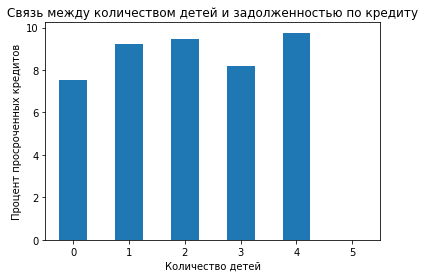

In [25]:
plot = ratio.plot.bar(title = 'Связь между количеством детей и задолженностью по кредиту', rot=0)
plot.set_xlabel('Количество детей')
plot.set_ylabel('Процент просроченных кредитов')

plt.show()

**Также выведем сводную таблицу. Для этого добавим в датафрейм столбец с названиями категорий в зависимости от числа детей. Многодетных клиентов (3-5 детей) объединим в одну категорию.**

In [26]:
def categorize_children(row):
    try:
        if row == 0:
            return 'детей нет'
        elif row == 1:
            return 'один ребенок'
        elif row == 2:
            return 'двое детей'
        elif row >= 3:
            return 'трое или более детей'
    except:
        return 'нет категории'

In [27]:
data['children_category'] = data['children'].apply(categorize_children)

In [28]:
data_grouped = data.groupby('children_category').agg({'debt': ['count', 'sum']})
data_grouped.columns = ['amount of credits', 'amount of debts']
data_grouped = data_grouped.reset_index()

pd.options.display.float_format = '{:,.2f}'.format
data_grouped['percent of debt credits'] = data_grouped['amount of debts'] / data_grouped['amount of credits'] * 100

data_grouped.sort_values(by='percent of debt credits', ascending=False)

,children_category,amount of credits,amount of debts,percent of debt credits
0,двое детей,2052,194,9.45
2,один ребенок,4808,444,9.23
3,трое или более детей,380,31,8.16
1,детей нет,14091,1063,7.54


**Вывод: зависимости между количеством детей и возвратом кредита в срок нет. Мы видим, что клиенты без детей берут кредиты гораздо чаще клиентов с детьми. Задолженность у всех групп возникает примерно одинаково часто. Многодетные клиенты (с 3-5 детьми) берут кредиты гораздо реже клиентов из других категорий.** 

---

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Для начала посмотрим на количество просроченных кредитов для каждой группы семейного положения.**

In [29]:
data.groupby('family_status')['debt'].sum().sort_values(ascending=False)

family_status
женат / замужем          927
гражданский брак         385
Не женат / не замужем    273
в разводе                 84
вдовец / вдова            63
Name: debt, dtype: int64

**На первый взгляд зависимость есть - клиенты в гражданском и официальном браке берут кредиты чаще других. Посмотрим на общее число кредитов для каждой из групп.**

In [30]:
data.groupby('family_status')['debt'].count().sort_values(ascending=False)

family_status
женат / замужем          12261
гражданский брак          4134
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: debt, dtype: int64

**Видим, что клиенты в браке в принципе чаще других берут кредиты. Посмотрим на отношение просроченных кредитов к общему числу кредитов в каждой группе.**

In [31]:
ratio = data.groupby('family_status')['debt'].sum() / data.groupby('family_status')['debt'].count() * 100
ratio.sort_values(ascending=False)

family_status
Не женат / не замужем   9.76
гражданский брак        9.31
женат / замужем         7.56
в разводе               7.06
вдовец / вдова          6.62
Name: debt, dtype: float64

**Клиенты вне брака, а также клиенты, состоящие в гражданском браке, допускают задолженности по кредиту чаще других. Реже всего задолженность появляется у вдовцов/вдов.**

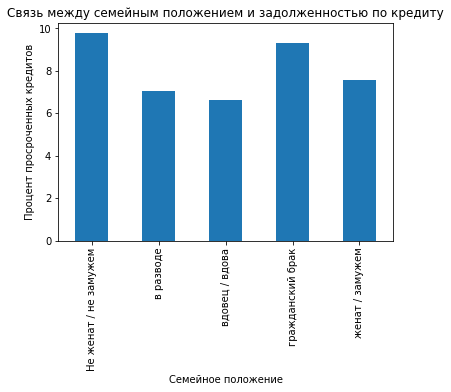

In [32]:
plot = ratio.plot.bar(title = 'Связь между семейным положением и задолженностью по кредиту')
plot.set_xlabel('Семейное положение')
plot.set_ylabel('Процент просроченных кредитов')

plt.show()

**Помимо графика, также выведем сводную таблицу.**

In [33]:
data_grouped = data.groupby('family_status').agg({'debt': ['count', 'sum']})
data_grouped.columns = ['amount of credits', 'amount of debts']
data_grouped = data_grouped.reset_index()
data_grouped['percent of debt credits'] = data_grouped['amount of debts'] / data_grouped['amount of credits'] * 100

data_grouped.sort_values(by='percent of debt credits', ascending=False)

,family_status,amount of credits,amount of debts,percent of debt credits
0,Не женат / не замужем,2796,273,9.76
3,гражданский брак,4134,385,9.31
4,женат / замужем,12261,927,7.56
1,в разводе,1189,84,7.06
2,вдовец / вдова,951,63,6.62


**Вывод: явной зависимости между семейным положением клиента и возвратом кредита в срок нет. Мы видим, что чаще всего задолженность по кредиту возникает у клиентов не состоящих в браке, но при этом вторая и третья группы по количеству задолженностей - люди в браке (гражданском и официальном).** 

---

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Посмотрим на количество кредитов с задолженностью по каждой из категорий дохода.**

In [34]:
data.groupby('total_income_category')['debt'].sum().sort_values(ascending=False)

total_income_category
C    1353
B     354
D      21
A       2
E       2
Name: debt, dtype: int64

**Больше всего задолженностей возникает у клиентов со средним доходом - категория 'C': 50001–200000.**

**Посмотрим на общее число взятых кредитов по каждой категории доходов.**

In [35]:
data.groupby('total_income_category')['debt'].count().sort_values(ascending=False)

total_income_category
C    15921
B     5014
D      349
A       25
E       22
Name: debt, dtype: int64

**Общее количество кредитов у клиентов со средним доходом также больше, чем у всех остальных.**

**Рассчитаем отношение кредитов с задолженностью к общему числу кредитов для каждой группы.**

In [36]:
ratio = data.groupby('total_income_category')['debt'].sum() / data.groupby('total_income_category')['debt'].count() * 100
ratio.sort_values(ascending=False)

total_income_category
E   9.09
C   8.50
A   8.00
B   7.06
D   6.02
Name: debt, dtype: float64

**Для наглядности построим график.**

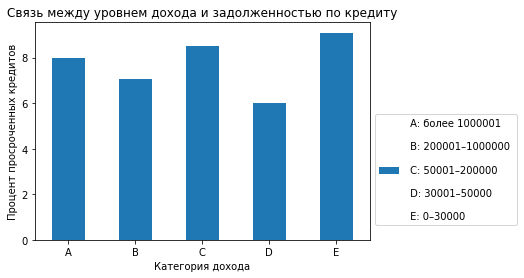

In [37]:
plot = ratio.plot.bar(title = 'Связь между уровнем дохода и задолженностью по кредиту', rot = 0,
                      label = """ A: более 1000001 
                      \n B: 200001–1000000 
                      \n C: 50001–200000 
                      \n D: 30001–50000 
                      \n E: 0–30000""")
plot.set_xlabel('Категория дохода')
plot.set_ylabel('Процент просроченных кредитов')

plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()


**Продублируем данные в сводной таблице.**

In [38]:
data_grouped = data.groupby('total_income_category').agg({'debt': ['count', 'sum']})
data_grouped.columns = ['amount of credits', 'amount of debts']
data_grouped = data_grouped.reset_index()
data_grouped['percent of debt credits'] = data_grouped['amount of debts'] / data_grouped['amount of credits'] * 100

data_grouped.sort_values(by='percent of debt credits', ascending=False)

,total_income_category,amount of credits,amount of debts,percent of debt credits
4,E,22,2,9.09
2,C,15921,1353,8.50
0,A,25,2,8.00
1,B,5014,354,7.06
3,D,349,21,6.02


**Вывод: прямой зависимости между уровнем дохода и возвратом кредита в срок нет. Клиенты с наименьшим, со средним и наибольшим уровнем дохода примерно одинаково часто допускают образование задолженности по кредиту.**

**При этом, важно учитывать, что люди с наименьшим и наибольшим уровнем дохода берут кредиты очень редко. Самые частые получатели кредитов - клиенты со средним уровнем дохода.** 

---

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

**Посмотрим на число кредитов с задолженностью по каждой цели кредита.**

In [39]:
data.groupby('purpose_category')['debt'].sum()

purpose_category
операции с автомобилем      400
операции с недвижимостью    780
получение образования       369
проведение свадьбы          183
Name: debt, dtype: int64

**Теперь оценим общее число кредитов по каждой категории. Видим, что больше всего кредитов берут для различных операций с недвижимостью.**

In [40]:
data.groupby('purpose_category')['debt'].count()

purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64

**Посчитаем отношение кредитов с задолженностью к общему числу кредитов по каждой категории.**

In [41]:
ratio = data.groupby('purpose_category')['debt'].sum() / data.groupby('purpose_category')['debt'].count() * 100
ratio.sort_values(ascending=False)

purpose_category
операции с автомобилем     9.35
получение образования      9.25
проведение свадьбы         7.91
операции с недвижимостью   7.26
Name: debt, dtype: float64

**Для наглядности построим график.**

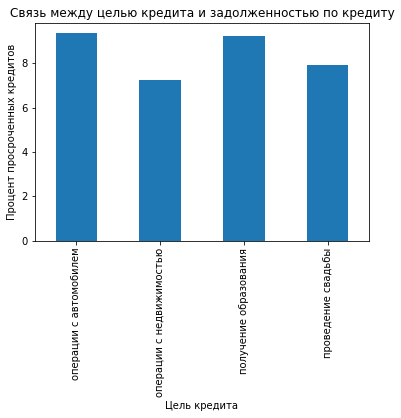

In [42]:
plot = ratio.plot.bar(title = 'Связь между целью кредита и задолженностью по кредиту')
plot.set_xlabel('Цель кредита')
plot.set_ylabel('Процент просроченных кредитов')

plt.show()

**Сводная таблица по результатам:**

In [43]:
data_grouped = data.groupby('purpose_category').agg({'debt': ['count', 'sum']})
data_grouped.columns = ['amount of credits', 'amount of debts']
data_grouped = data_grouped.reset_index()
data_grouped['percent of debt credits'] = data_grouped['amount of debts'] / data_grouped['amount of credits'] * 100

data_grouped.sort_values(by='percent of debt credits', ascending=False)

,purpose_category,amount of credits,amount of debts,percent of debt credits
0,операции с автомобилем,4279,400,9.35
2,получение образования,3988,369,9.25
3,проведение свадьбы,2313,183,7.91
1,операции с недвижимостью,10751,780,7.26


**Вывод: видим, что задолженности возникают по кредитам для операций с автомобилем и для получения образования чаще, чем по двум другим категориям. Кредиты на проведение свадеб и для операций с недвижимостью чаще возвращаются в срок.**

---

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ: можно заметить, что пропуски присутствуют только в двух столбцах: в столбце со стажем и в столбце с общим доходом. При этом, пропуски присутствуют в двух столбцах для каждой строки одновременно, то есть если в датафрейме нет информации о стаже клиента, то также нет и информации о его доходе.*

*Возможны следующие причины*:
- *информация по данным клиентам лежит в датафрейме давно - еще с тех пор, когда указывать информацию об общем стаже и уровне дохода было необязательно.*
- *мы не знаем размер кредита (он не указан в датафрейме), поэтому он может быть совсем невелик, а значит указание стажа и уровня дохода для его получения не требуется.*
- *нельзя исключать человеческий фактор, данные просто не были внесены в датафрейм.*

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ: заполнение пропусков медианным значением для количественных переменных позволяет (насколько это возможно) уменьшить влияние аномальных значений. То есть тех значений, что сильно меньше или сильно больше средних значений для определенной переменной. Медиана (median()), в отличие от среднего (mean()) учитывает только значения, которые разбивает весь список значений на две равные (по количеству) части, в то время как для вычисления среднего используются абсолютно все значения переменной.* 

---

### Шаг 4: общий вывод.

**В данном проекте входными данными являлась статистика о платежеспособности клиентов. Необходимо было выяснить, есть ли зависимость между различными характеристиками клиентов (количество детей, семейное положение, уровень дохода, а также цель кредита) и возвратом кредита в срок.**

**Для получения корректных результатов была произведена предобработка данных: обработаны пропущенные значения, дубликаты, аномальные значения, неверные типы данных.**

**Для проведения исследования данные были разбиты по различным категориям.**

**По результатам проведенной работы можно сделать следующие выводы:**
- **Чаще всего кредиты берут люди без детей, но чаще большинства клиентов с детьми возвращают кредиты в срок. Многодетные клиенты (3-5 детей) берут кредиты значительно реже клиентов без детей, или с 1-2 детьми.**
- **Семейное положение на возврат кредита в срок практически не влияет. Задолженность чаще других возникает у клиентов вне брака, реже у клиентов в разводе, а также вдов/вдовцов. Кредитному отделу следует с осторожностью относиться к клиентам, которые не состоят или не состояли в браке.**
- **Задолженность по кредиту допускают клиенты как с высоким, средним, так и с низким уровнем дохода. Явной зависимости нет.**
- **Автокредиты, а также кредиты на образование приводят к задолженности чаще, чем кредиты для проведения свадьбы или кредиты для операций с недвижимостью.**

**Рекомендуется также разобраться с причиной возникновения пропущенных значений, по возможности для более точных дальнейших ислледований данную проблему решить.**